In [11]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [3]:
df=pd.read_csv('Mumbai_1990_2022_Santacruz.csv')

In [4]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0


In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [5]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [7]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

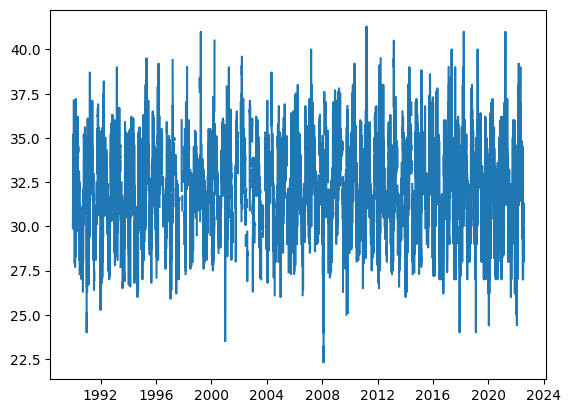

In [8]:
plt.plot(df['time'],df['tmax'])

In [14]:
data=df[['time','tmax']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_20880\2974680685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
1,02-01-1990,29.9
2,03-01-1990,30.7
3,04-01-1990,31.8
4,05-01-1990,33.7
5,06-01-1990,33.5


**Training the model**

In [10]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


Finding best initial lr:   0%|          | 0/250 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,30.866295,33.818554,1.395948,0.0,0
1,25.250799,28.149199,1.064597,0.0,1
2,19.782087,22.577492,0.748361,0.0,2
3,14.612150,17.140425,0.467034,0.0,3
4,10.339286,12.435245,0.258063,0.0,4
...,...,...,...,...,...
995,1.338892,1.756428,0.006712,0.0,995
996,1.337417,1.758862,0.006703,0.0,996
997,1.337714,1.759551,0.006695,0.0,997
998,1.336972,1.758051,0.006689,0.0,998


3.FORECASTING

In [11]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 313it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,30.039438,32.098793,-2.039386,-0.019971
1,2022-07-27,None,30.034893,32.098682,-2.039443,-0.024346
2,2022-07-28,None,30.080746,32.098572,-2.038467,0.020642
3,2022-07-29,None,30.015074,32.098457,-2.036775,-0.046608
4,2022-07-30,None,30.068562,32.098343,-2.034503,0.004720


In [12]:
forecast.tail()


,ds,y,yhat1,trend,season_yearly,season_weekly
895,2025-01-06,None,31.008057,31.997826,-1.063449,0.073678
896,2025-01-07,None,30.887459,31.997715,-1.090298,-0.019958
897,2025-01-08,None,30.858414,31.997601,-1.114953,-0.024233
898,2025-01-09,None,30.880745,31.997488,-1.137419,0.020675
899,2025-01-10,None,30.793121,31.997375,-1.157612,-0.046642


In [16]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,30.043982,32.103504,-2.040910,-0.018613
1,2022-07-27,None,30.037565,32.103394,-2.040972,-0.024856
2,2022-07-28,None,30.082323,32.103279,-2.039968,0.019011
3,2022-07-29,None,30.015469,32.103168,-2.038218,-0.049482
4,2022-07-30,None,30.071989,32.103058,-2.035859,0.004791
...,...,...,...,...,...,...
895,2025-01-06,None,31.011055,32.003098,-1.067904,0.075860
896,2025-01-07,None,30.888624,32.002987,-1.095763,-0.018600
897,2025-01-08,None,30.856705,32.002876,-1.121426,-0.024743
898,2025-01-09,None,30.876919,32.002762,-1.144889,0.019044


In [13]:
plot1=model.plot(forecast)

In [14]:
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'e50fccb8-c466-4d34-b543-f10af2b782eb',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'y': array([30.039438, 30.034893, 30.080746, ..., 30.858414, 30.880745, 30.793121],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '

In [19]:
plot2=model.plot_components(forecast)
plt.show()
plot2

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'fcbc20bb-d51b-4737-bc06-df452648e40f',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([32.103504, 32.103394, 32.10328 , ..., 32.002876, 32.00276 , 32.00265 ],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',

In [15]:
with open('mumbai_model.pkl','wb') as f:
    pickle.dump(model,f)

In [16]:
model

In [32]:
del model

In [17]:
with open('mumbai_model.pkl','rb') as f:
    modelz=pickle.load(f)

In [18]:
modelz

In [20]:
modelz.restore_trainer()

In [31]:
future1=modelz.make_future_dataframe(data,periods=50000)
forecast1=modelz.predict(future1)
forecast1.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 0it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,30.039438,32.098793,-2.039386,-0.019971
1,2022-07-27,None,30.034893,32.098682,-2.039443,-0.024346
2,2022-07-28,None,30.080746,32.098572,-2.038467,0.020642
3,2022-07-29,None,30.015074,32.098457,-2.036775,-0.046608
4,2022-07-30,None,30.068562,32.098343,-2.034503,0.004720


In [32]:
plotz=modelz.plot(forecast1)

In [33]:
plotz

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~50D</i>',
              'type': 'scatter',
              'uid': '2d16d06d-e8be-4e5a-b991-a8c632000f4e',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 9, 9, 0, 0),
                          datetime.datetime(2022, 10, 24, 0, 0), ...,
                          datetime.datetime(2159, 3, 19, 0, 0),
                          datetime.datetime(2159, 5, 21, 0, 0),
                          datetime.datetime(2159, 6, 17, 0, 0)], dtype=object),
              'y': array([30.039438, 30.20595 , 34.05058 , ..., 27.531616, 28.229462, 26.711226],
                         dtype=float32)},
             {'hovertext': '',
              'marker': {'color': 'black', 'size': 4},
              'mo

In [6]:
# Filter the DataFrame to keep only rows from the year 2015 and beyond
df1 = df[df['time'].dt.year >= 2015]

# Reset the index of the DataFrame
df1.reset_index(drop=True, inplace=True)

In [7]:
print(df1)

           time  tavg  tmin  tmax  prcp
0    2015-01-01  22.9   NaN  27.3   NaN
1    2015-01-02  23.6   NaN  27.6   NaN
2    2015-01-03  24.0   NaN   NaN   NaN
3    2015-01-04  26.1   NaN  31.5   NaN
4    2015-01-05  26.3   NaN  32.3   NaN
...         ...   ...   ...   ...   ...
2758 2022-07-21  27.6  25.6  30.5  10.9
2759 2022-07-22  28.3  26.0  30.5   3.0
2760 2022-07-23  28.2  25.8  31.3   5.1
2761 2022-07-24  28.1  25.6  30.4   7.1
2762 2022-07-25  28.3  25.1  30.2   7.1

[2763 rows x 5 columns]


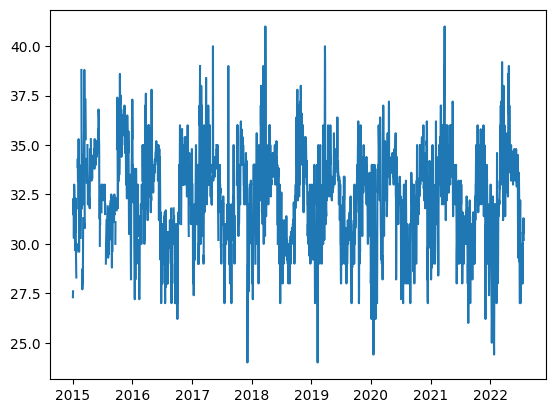

In [9]:
plt.plot(df1['time'],df1['tmax'])

In [10]:
data1=df1[['time','tmax']]
data1.dropna(inplace=True)
data1.columns=['ds','y']
data1.head()

C:\Users\Amey\AppData\Local\Temp\ipykernel_23704\3302398128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace=True)


,ds,y
0,2015-01-01,27.3
1,2015-01-02,27.6
3,2015-01-04,31.5
4,2015-01-05,32.3
5,2015-01-06,31.5


In [18]:
modeln=NeuralProphet()  #untrained neuralprophet model
modeln.fit(data1,freq='D',epochs=1500)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.068% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (84) is too small than the required number                     for the learning rate finder (236). The results might not be optimal.


Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,17.545507,20.203115,0.791180,0.0,0
1,16.712048,19.266230,0.738975,0.0,1
2,15.694077,18.164871,0.676014,0.0,2
3,14.943442,17.345697,0.630617,0.0,3
4,14.063186,16.334337,0.574798,0.0,4
...,...,...,...,...,...
1495,1.353737,1.764692,0.008442,0.0,1495
1496,1.352366,1.764268,0.008434,0.0,1496
1497,1.352518,1.767784,0.008446,0.0,1497
1498,1.360916,1.778451,0.008499,0.0,1498


In [21]:
futuren=modeln.make_future_dataframe(data1,periods=430)
forecast=modeln.predict(futuren)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.068% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.767% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.767% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 84it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,29.853699,32.015549,-2.141712,-0.020136
1,2022-07-27,None,29.768421,32.015099,-2.142210,-0.104469
2,2022-07-28,None,29.850359,32.014656,-2.141356,-0.022938
3,2022-07-29,None,29.822472,32.014206,-2.139446,-0.052288
4,2022-07-30,None,29.857189,32.013760,-2.136604,-0.019967


In [22]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
425,2023-09-24,None,30.991272,31.825573,-0.925531,0.091230
426,2023-09-25,None,31.118923,31.825125,-0.834854,0.128652
427,2023-09-26,None,31.063332,31.824678,-0.741345,-0.020001
428,2023-09-27,None,31.074413,31.824230,-0.645373,-0.104446
429,2023-09-28,None,31.253965,31.823784,-0.546933,-0.022886


In [10]:
with open('mumbai_model.pkl','rb') as f:
    model=pickle.load(f)

In [16]:
model.restore_trainer()

In [25]:
future=model.make_future_dataframe(data,periods=290)
forecast=model.predict(future)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - F:\apps\anaconda\envs\env_3_10\lib\site-packages\neuralprophet\df_utils.py:1112: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 52.078% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
WARNING - (py.warnings._showwarnmsg) - F:\apps\anaconda\envs\env_3_10\lib\site-packages\neuralprophet\data\split.py:179: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to incons

Predicting: 0it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-08,None,32.637436,32.083565,0.533195,0.020675
1,2022-12-09,None,32.498833,32.083454,0.462102,-0.046722
2,2022-12-10,None,32.479641,32.083340,0.391543,0.004758
3,2022-12-11,None,32.396385,32.083229,0.321288,-0.008129
4,2022-12-12,None,32.408569,32.083115,0.251731,0.073725


In [26]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
285,2023-09-19,None,30.755213,32.051414,-1.276305,-0.019896
286,2023-09-20,None,30.828634,32.051300,-1.198414,-0.024253
287,2023-09-21,None,30.954651,32.051186,-1.117211,0.020674
288,2023-09-22,None,30.971645,32.051075,-1.032844,-0.046585
289,2023-09-23,None,31.110218,32.050964,-0.945500,0.004756
